## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

#In the wake of the terrorist attacks of 11 September 2001 also notoriously known as the 9/11 attack, the United Nations created the Counter-Terrorism Committee. The committee then went on to take measures for assisting member countries in terror attack mitigation and defense but failed to be effective. The committee then started thinking about the bigger picture and the prohibition of incitement to commit terrorist acts resolution in 2014. It changed its SOP.

#The committee gathered a data science team to find the root cause for terrorism, the data science team decided to make use of the START terrorism database to find some patterns. As a subpart of the data science team, we are tasked with exploring, cleaning, and finding the key points from the database. Now let's go ahead and make it work.

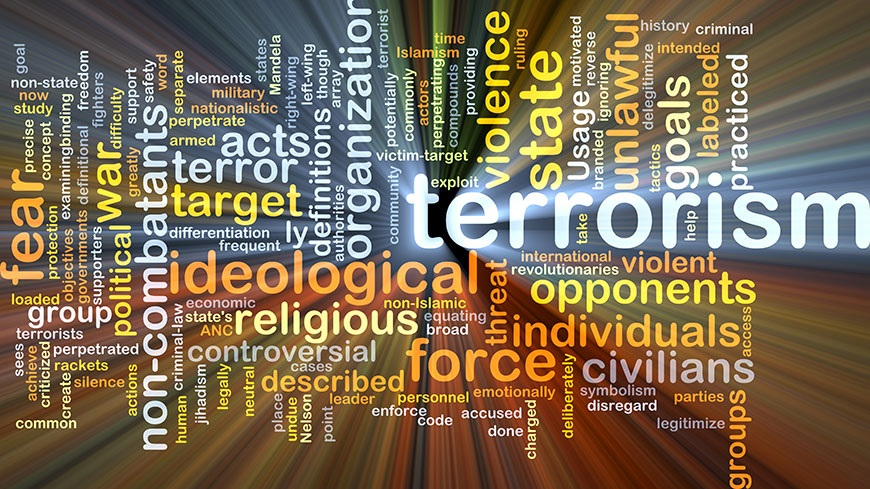

##**Importing libraries for data manipulation and visualization**

In [84]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']= (20,10)
from matplotlib import style

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
#loading data
try:
  location1 = "/content/drive/MyDrive/Global Terrorism Analysis/Global Terrorism Data.csv"
  df= pd.read_csv(location1, encoding = 'ISO-8859-1',low_memory=False)
  pass

except FileNotFoundError:
  pass

try:
  location3 = "/content/drive/MyDrive/Colab Notebooks/project/My project/Global Terrorism Data.csv"
  df= pd.read_csv(location3, encoding = 'ISO-8859-1',low_memory=False)
  pass

except FileNotFoundError:
  pass 


try:
  location2 = "/content/drive/MyDrive/appsheet/terrorism.csv"
  df = pd.read_csv(location2, encoding = 'ISO-8859-1',low_memory=False)
  pass
except FileNotFoundError:
  pass

gtd = df.copy()


In [87]:
gtd.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [88]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,...,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,20

In [89]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [90]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

#**Cleaning the dataset for optimized working**


In [91]:
#listing the required columns
columns_to_keep1 = ['eventid','iyear', 'imonth','country','country_txt',
 'region','region_txt','provstate','city','success',
 'attacktype1','attacktype1_txt','targtype1','targtype1_txt',
 'gname','weaptype1', 'weaptype1_txt',
 'nkill','nwound']

#**Creating new dataframes with selected columns**

In [92]:
gtd_df = df[columns_to_keep1].rename(columns = {'weaptype1_txt':'weapon'})

In [93]:
gtd_df.shape

(181691, 19)

In [94]:

gtd_df2 = df[columns_to_keep1]

In [95]:
gtd_df2.shape

(181691, 19)

In [96]:

new_gtd= gtd_df2.rename(columns = {'iyear': 'year', 'imonth': 'month', 'country':"country_id",'country_txt':'country_name','region':"region_id",'region_txt':"region_name",'attacktype1':'attacktype_id','attacktype1_txt':'attacktype','targtype1':'targtype_id', 'targtype1_txt':'targtype','weaptype1':"weapon_id",
       'weaptype1_txt':"weapon","nkill":"deaths","nwound":"injured"})

In [97]:
gtd_df.head()

,eventid,iyear,imonth,country,country_txt,region,region_txt,provstate,city,success,attacktype1,attacktype1_txt,targtype1,targtype1_txt,gname,weaptype1,weapon,nkill,nwound
0,197000000001,1970,7,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,1,1,Assassination,14,Private Citizens & Property,MANO-D,13,Unknown,1.0,0.0
1,197000000002,1970,0,130,Mexico,1,North America,Federal,Mexico city,1,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),23rd of September Communist League,13,Unknown,0.0,0.0
2,197001000001,1970,1,160,Philippines,5,Southeast Asia,Tarlac,Unknown,1,1,Assassination,10,Journalists & Media,Unknown,13,Unknown,1.0,0.0
3,197001000002,1970,1,78,Greece,8,Western Europe,Attica,Athens,1,3,Bombing/Explosion,7,Government (Diplomatic),Unknown,6,Explosives,NaN,NaN
4,197001000003,1970,1,101,Japan,4,East Asia,Fukouka,Fukouka,1,7,Facility/Infrastructure Attack,7,Government (Diplomatic),Unknown,8,Incendiary,NaN,NaN


#**Replacing NaN values with "0" for ease of manipulation**

In [98]:
df.fillna(0)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,0,0,0,58,Dominican Republic,2,Central America & Caribbean,0,Santo Domingo,18.456792,-69.951164,1.0,0,0,0,1,1,1,0.0,0.0,0,0.0,1,0,1,Assassination,0.0,0,0.0,0,14,Private Citizens & Property,68.0,Named Civilian,0,Julio Guzman,...,0.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,PGIS,0,0,0,0,0
1,197000000002,1970,0,0,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,0,0,1,1,1,0.0,0.0,0,0.0,1,0,6,Hostage Taking (Kidnapping),0.0,0,0.0,0,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,1.0,1.0,0.0,0.0,0.0,0,Mexico,1.0,800000.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,PGIS,0,1,1,1,0
2,197001000001,1970,1,0,0,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,0,0,1,1,1,0.0,0.0,0,0.0,1,0,1,Assassination,0.0,0,0.0,0,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,0.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,PGIS,-9,-9,1,1,0
3,197001000002,1970,1,0,0,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,0,0,1,1,1,0.0,0.0,0,0.0,1,0,3,Bombing/Explosion,0.0,0,0.0,0,7,Government (Diplomatic),46.0,Embassy/Consulate,0,U.S. Embassy,...,0.0,0,Explosive,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,PGIS,-9,-9,1,1,0
4,197001000003,1970,1,0,0,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,0,0,1,1,1,-9.0,0.0,0,0.0,1,0,7,Facility/Infrastructure Attack,0.0,0,0.0,0,7,Government (Diplomatic),46.0,Embassy/Consulate,0,U.S. Consulate,...,0.0,0,Incendiary,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0,0,0,PGIS,-9,-9,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,0,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,0.0,0,0.0,0,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,...,0.0,0,0,1.0,0.0,0.0,2.0,0.0,0.0,-9,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,0
181687,201712310029,2017,12,31,0,0,0,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Ac

In [99]:
gtd_df.shape

(181691, 19)

#**1. Trend in the number of terror attacks over the past five decades**





In [100]:
 gtd_df1 = gtd_df.groupby('iyear')['eventid'].count().reset_index().rename(columns = {'iyear':'year', 'eventid':'no_of_attacks'})



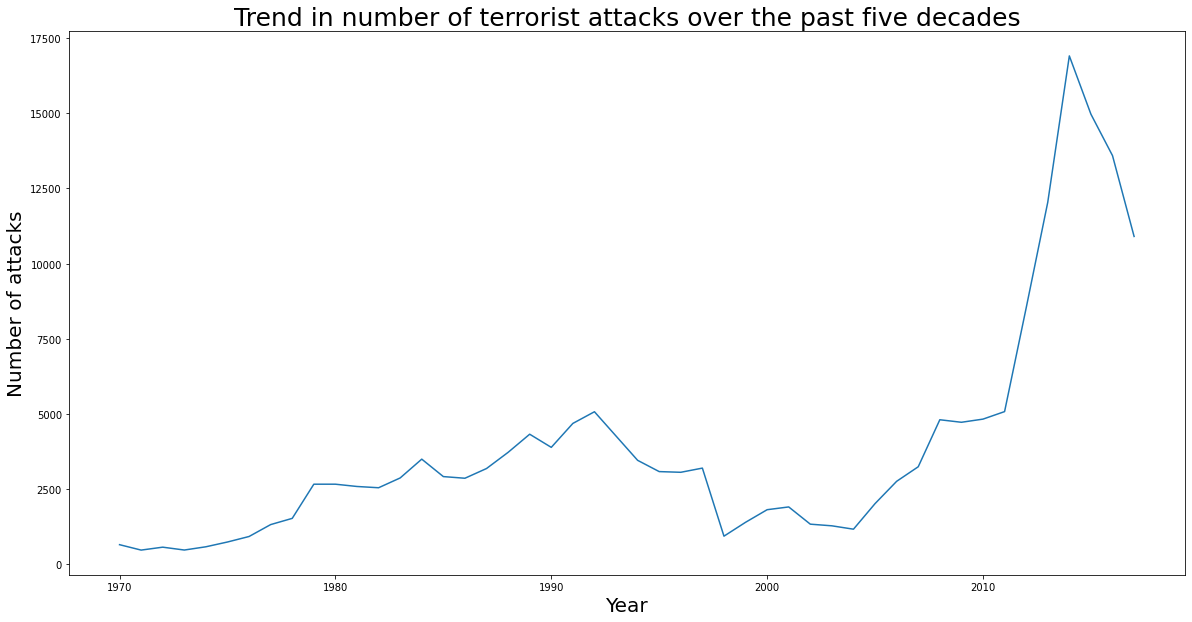

In [101]:

plt.rcParams["figure.figsize"]=(20,10)
sns.lineplot(data = gtd_df1
            ,x = 'year'
            ,y = 'no_of_attacks'
            )

plt.title("Trend in number of terrorist attacks over the past five decades",fontsize=25)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Number of attacks",fontsize=20)
plt.show()

### **Inferences**
### The year **2014**  endured the the most number of terror attacks i.e **16903** attacks.Uff!! looks like 2014 saw lot of violence and chaos.
### Since 2014 we can observe a downward trend in the number of terror attacks.
.

#**2. Most vulnerable target types**


In [102]:
gtd_df2 = gtd_df.targtype1_txt.value_counts().reset_index().rename(columns = {'index':'Target type','targtype1_txt':'Number of attacks' })

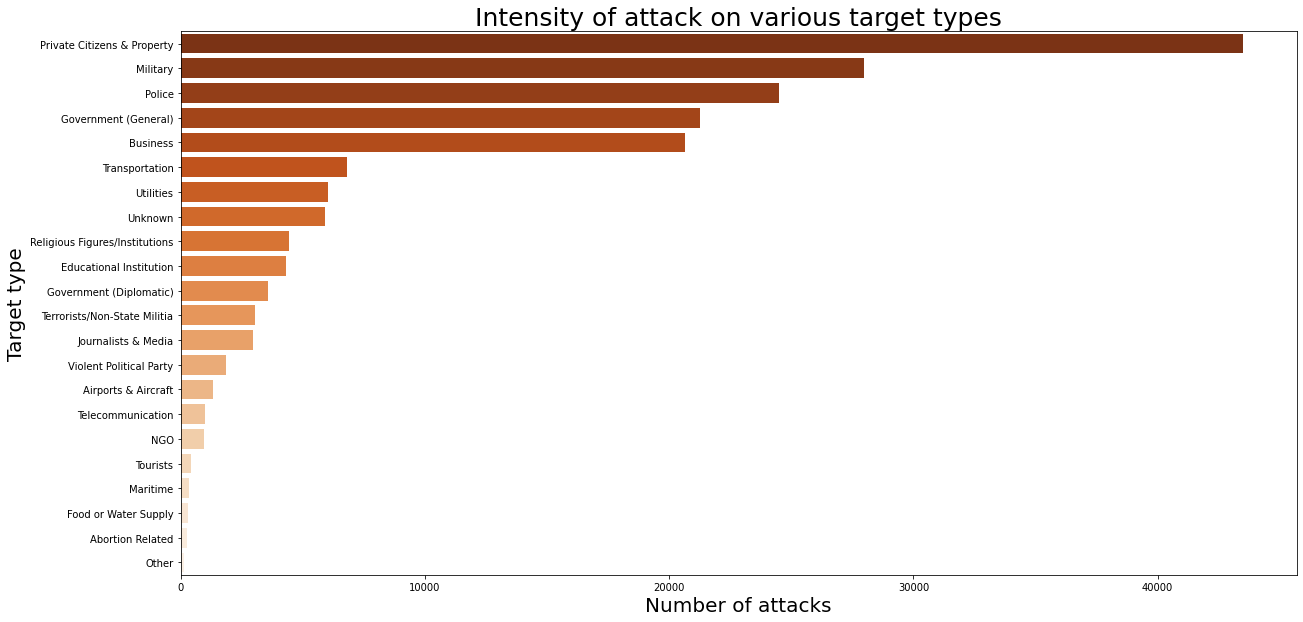

In [103]:
plt.rcParams["figure.figsize"]=(20,10)
sns.barplot(data = gtd_df2
            ,x = 'Number of attacks'
            ,y = 'Target type', ci = None,palette = 'Oranges_r'
            )
plt.rcParams["figure.figsize"]=(30,7)
plt.title("Intensity of attack on various target types",fontsize=25)
plt.xlabel("Number of attacks",fontsize=20)
plt.ylabel("Target type",fontsize=20)
plt.show()

In [104]:
gtd_df.targtype1_txt.value_counts().reset_index()[:5]

,index,targtype1_txt
0,Private Citizens & Property,43511
1,Military,27984
2,Police,24506
3,Government (General),21283
4,Business,20669


##**Inference**
##**Private citizens and property** are the most vulnerable terror targets followed by the **Military personnel** who are always indulged in fending off terrorists and neutralizing them, which invariably puts them in harms way

# **3. Wrath of the Terrorist Arsenal**

##By observing the trend in the number of terror attacks, one cannot help but imagine that the number of casualties will also follow the same trend. However, there are many types of terror attacks and hence we cannot be a 100% sure that it will follow the same trend. Lets dive in and we shall let the statistics do the talking for us.

In [105]:
 gtd_df3 = gtd_df.groupby('weapon').agg({'nkill':'sum'}).rename(columns = {'nkill':'deaths'}).reset_index().sort_values("deaths", ascending=False)

In [106]:
gtd_df3.head(20)


,weapon,deaths
4,Firearms,174894.0
2,Explosives,174277.0
10,Unknown,42620.0
6,Melee,10575.0
5,Incendiary,5476.0
11,Vehicle (not to include vehicle-borne explosiv...,3184.0
1,Chemical,624.0
7,Other,123.0
9,Sabotage Equipment,83.0
0,Biological,9.0


In [107]:
gtd_df3.weapon[0] = 'Vehicle'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


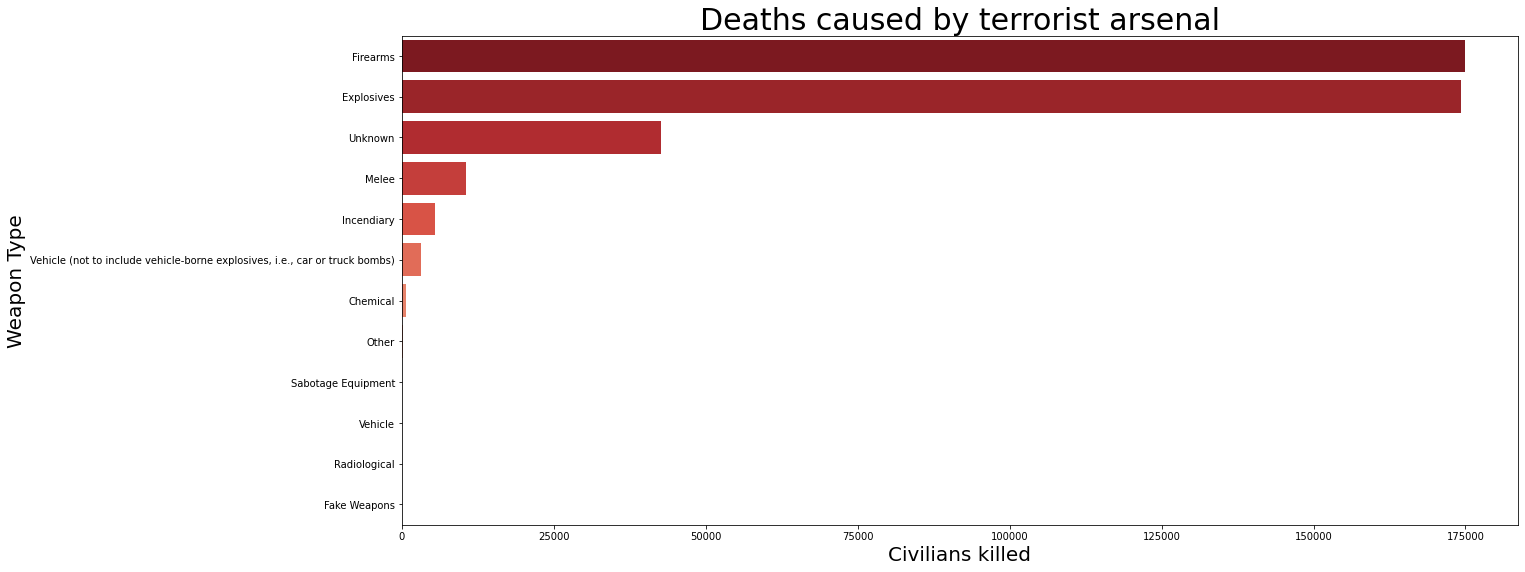

In [108]:
plt.rcParams["figure.figsize"]=(20,9)
sns.barplot(data = gtd_df3
            ,x = 'deaths'
            ,y = 'weapon', ci = None, palette = 'Reds_r'
            )
plt.rcParams["figure.figsize"]=(30,7)
plt.title("Deaths caused by terrorist arsenal",fontsize=30)
plt.xlabel("Civilians killed",fontsize=20)
plt.ylabel("Weapon Type",fontsize=20)
plt.show()


##**Inference**
## Explosives and firearms are the most dangerous weapons in the terrorist arsenal, amounting to kills close to a hundred thousand.

#**4.Intensity of terror attacks over various regions**


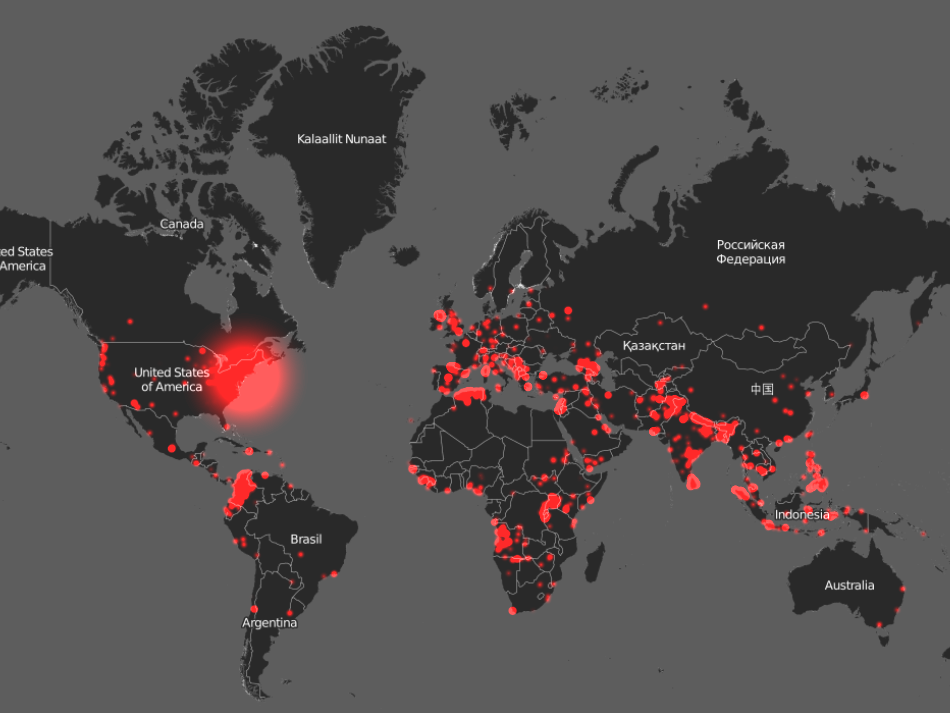

In [109]:
list(new_gtd.columns)

['eventid',
 'year',
 'month',
 'country_id',
 'country_name',
 'region_id',
 'region_name',
 'provstate',
 'city',
 'success',
 'attacktype_id',
 'attacktype',
 'targtype_id',
 'targtype',
 'gname',
 'weapon_id',
 'weapon',
 'deaths',
 'injured']

In [110]:
gtd5 = new_gtd.groupby('region_name')['region_id'].count().reset_index().sort_values("region_id", ascending=False)

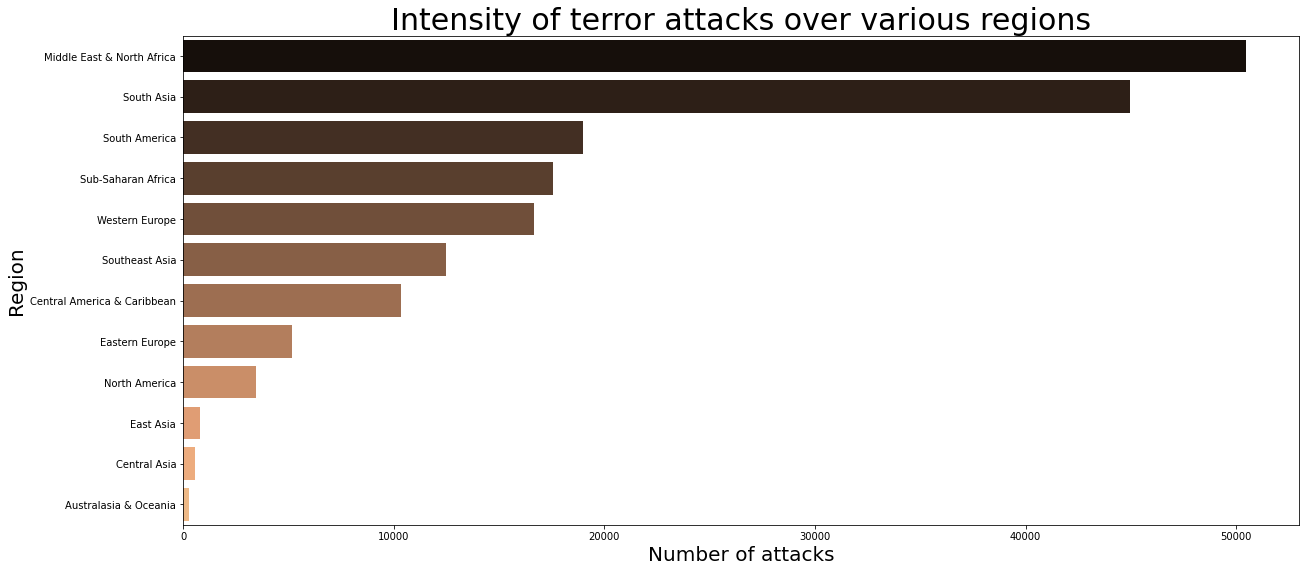

In [111]:
plt.rcParams["figure.figsize"]=(20,9)
sns.barplot(data = gtd5
            ,x = 'region_id'
            ,y = 'region_name', ci = None, palette = 'copper'
            )
plt.rcParams["figure.figsize"]=(30,7)
plt.title("Intensity of terror attacks over various regions",fontsize=30)
plt.ylabel("Region",fontsize=20)
plt.xlabel("Number of attacks",fontsize=20)
plt.show()

##**Inference**##
##The regions surrounding the **Middle East** are the ones which are most affected by terrorism, hence these regions are to be concentrated by the counter terrorism committee in top priority. ##

#**5.Success rate in fending off terrorists**

In [112]:
#Creating a new dataframe with required columns for the given problem
df0=new_gtd[['country_id','country_name','success']]

In [113]:
df0.head()

,country_id,country_name,success
0,58,Dominican Republic,1
1,130,Mexico,1
2,160,Philippines,1
3,78,Greece,1
4,101,Japan,1


In [114]:
#Creating separate dataframe for success and failure of terrorist attacks in each country 
success=df0[df0['success']==1]
failure=df0[df0['success']==0]

In [115]:
success.head()

,country_id,country_name,success
0,58,Dominican Republic,1
1,130,Mexico,1
2,160,Philippines,1
3,78,Greece,1
4,101,Japan,1


In [116]:
failure=failure.rename(columns={'success':'failure'})
failure.head()

,country_id,country_name,failure
6,218,Uruguay,0
10,217,United States,0
23,217,United States,0
39,160,Philippines,0
43,217,United States,0


In [117]:
#Taking the count of success of terrorist attacks in each country
df1=success.groupby("country_name").agg({"success":"count"})

In [118]:
#Taking the count of failure of terrorist attacks in each country
df2=failure.groupby("country_name").agg({"failure":"count"})

In [119]:
df1.head()

,success
country_name,
Afghanistan,11141
Albania,64
Algeria,2561
Andorra,1
Angola,486


In [120]:
df2.head()

,failure
country_name,
Afghanistan,1590
Albania,16
Algeria,182
Angola,13
Argentina,101


In [121]:
df1.shape

(202, 1)

In [122]:
df2.shape

(174, 1)

In [123]:
#Merging the two dataframes success and failure using inner as the size differs in number of rows
merged_df=pd.merge(df1,df2,how='inner', left_on='country_name',right_on='country_name')

In [124]:
merged_df

,success,failure
country_name,,
Afghanistan,11141,1590
Albania,64,16
Algeria,2561,182
Angola,486,13
Argentina,714,101
...,...,...
Yemen,2837,510
Yugoslavia,179,24
Zaire,45,5


In [125]:
#Calculating success rate of the terrorist attack
merged_df["terrorist_success_rate"]=merged_df["success"]*100/(merged_df["success"]+merged_df["failure"])

In [126]:
merged_df

,success,failure,terrorist_success_rate
country_name,,,
Afghanistan,11141,1590,87.510800
Albania,64,16,80.000000
Algeria,2561,182,93.364929
Angola,486,13,97.394790
Argentina,714,101,87.607362
...,...,...,...
Yemen,2837,510,84.762474
Yugoslavia,179,24,88.177340
Zaire,45,5,90.000000


In [127]:
#calculating defence success rate
merged_df["defence_success_rate"]=100-merged_df["terrorist_success_rate"]

In [128]:
merged_df.rename(columns={"success_rate":"terrorist_sucsess_rate"})

,success,failure,terrorist_success_rate,defence_success_rate
country_name,,,,
Afghanistan,11141,1590,87.510800,12.489200
Albania,64,16,80.000000,20.000000
Algeria,2561,182,93.364929,6.635071
Angola,486,13,97.394790,2.605210
Argentina,714,101,87.607362,12.392638
...,...,...,...,...
Yemen,2837,510,84.762474,15.237526
Yugoslavia,179,24,88.177340,11.822660
Zaire,45,5,90.000000,10.000000


In [129]:
merged_df.reset_index(inplace=True)

In [130]:
merged_df.sort_values(by="defence_success_rate",ascending=False,inplace=True)

In [131]:
#Checking the strogest 5 countries based on defence 
merged_df.head()

,country_name,success,failure,terrorist_success_rate,defence_success_rate
50,Gambia,1,2,33.333333,66.666667
69,Ireland,139,168,45.276873,54.723127
154,Turkmenistan,1,1,50.000000,50.000000
106,New Zealand,11,9,55.000000,45.000000
163,Vietnam,7,5,58.333333,41.666667


In [132]:
#Checking the weekest 5 countries based on defence
merged_df.tail()

,country_name,success,failure,terrorist_success_rate,defence_success_rate
102,Namibia,147,4,97.350993,2.649007
3,Angola,486,13,97.394790,2.605210
43,El Salvador,5227,93,98.251880,1.748120
128,Senegal,116,2,98.305085,1.694915
107,Nicaragua,1939,31,98.426396,1.573604


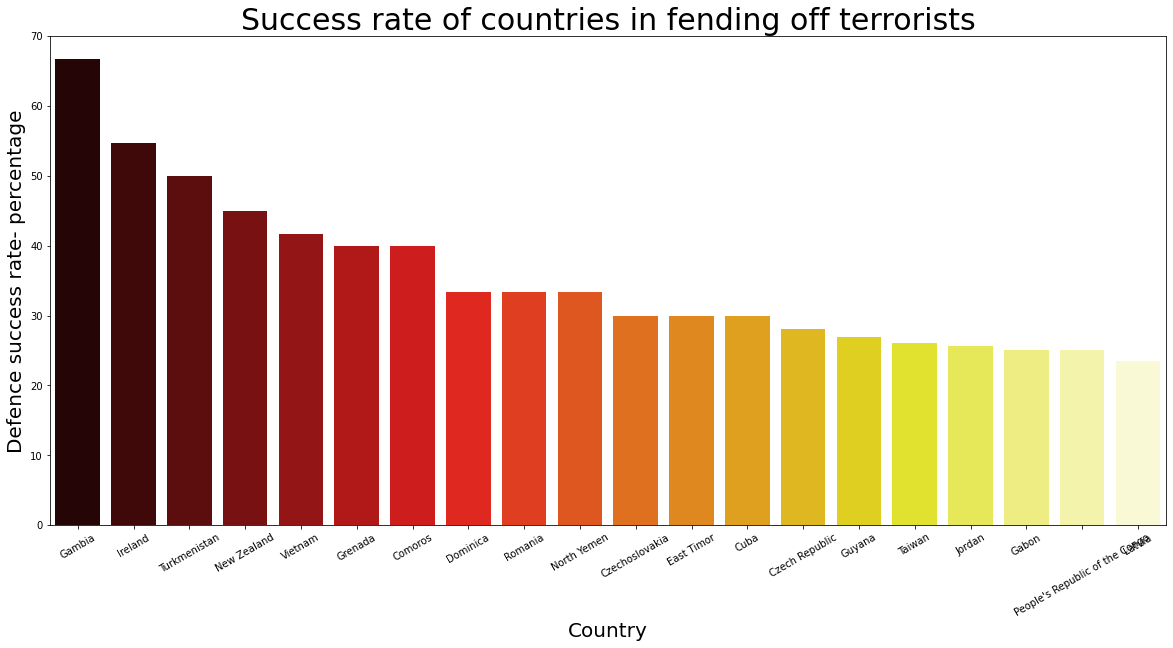

In [133]:
plt.rcParams["figure.figsize"]=(20,9)
sns.barplot(data = merged_df.head(20)
            ,x = 'country_name'
            ,y = 'defence_success_rate',palette ='hot'
            ).tick_params(axis='x', rotation=30)

plt.title("Success rate of countries in fending off terrorists",fontsize=30)
plt.xlabel("Country",fontsize=20)
plt.ylabel("Defence success rate- percentage",fontsize=20)
plt.show()

##**Inference**
## **Gambia** has the best defence against terrorism





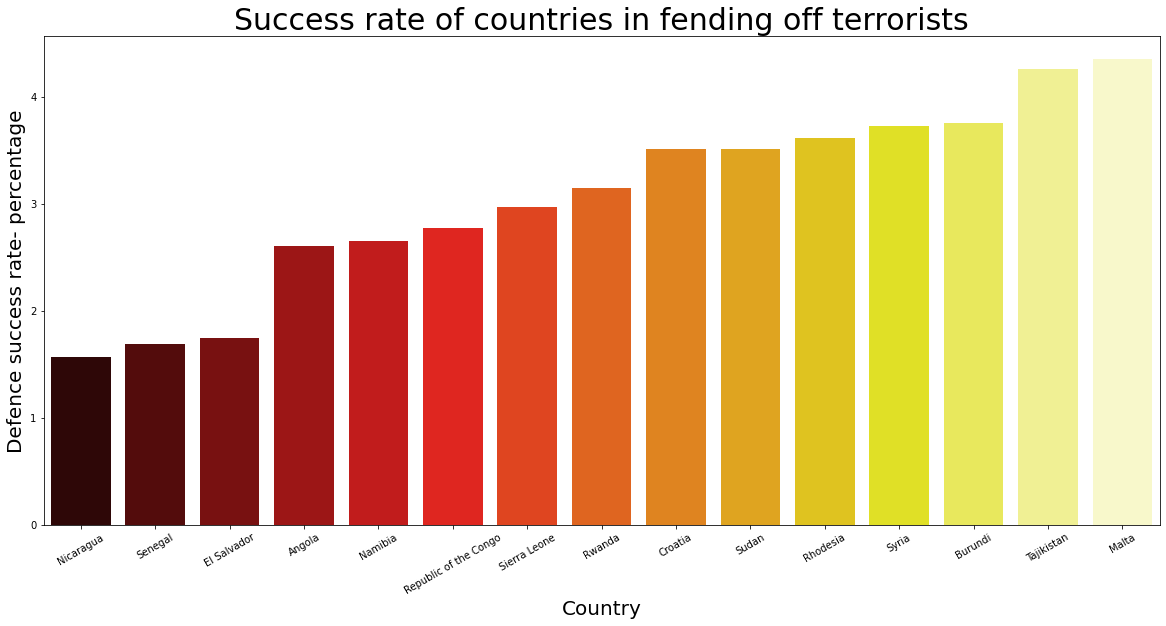

In [134]:
plt.rcParams["figure.figsize"]=(20,9)
sns.barplot(data = merged_df.tail(15).sort_values(by = 'defence_success_rate', ascending = True)
            ,x = 'country_name'
            ,y = 'defence_success_rate', palette ='hot'
            ).tick_params(axis='x', rotation=30)

plt.title("Success rate of countries in fending off terrorists",fontsize=30)
plt.xlabel("Country",fontsize=20)
plt.ylabel("Defence success rate- percentage",fontsize=20)
plt.show()

In [135]:
merged_df.tail()

,country_name,success,failure,terrorist_success_rate,defence_success_rate
102,Namibia,147,4,97.350993,2.649007
3,Angola,486,13,97.394790,2.605210
43,El Salvador,5227,93,98.251880,1.748120
128,Senegal,116,2,98.305085,1.694915
107,Nicaragua,1939,31,98.426396,1.573604


##**Inference**
## **Namibia,Angola,El Salvador, Senegal, Nicaragua** are the weakest countries in terms of defense against terrorism, hence these countries require meticulous support from counter terrorism committee


#**6.Number of terrorist groups in various regions** 

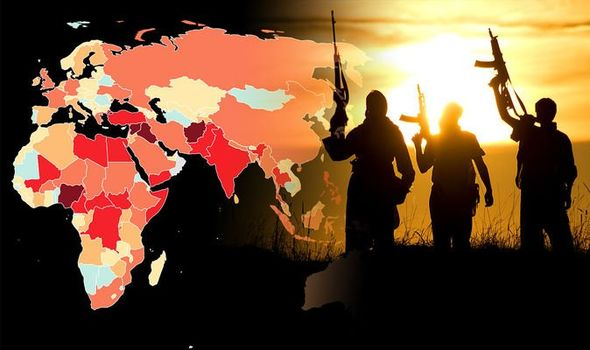

In [136]:
new_gtd

,eventid,year,month,country_id,country_name,region_id,region_name,provstate,city,success,attacktype_id,attacktype,targtype_id,targtype,gname,weapon_id,weapon,deaths,injured
0,197000000001,1970,7,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,1,1,Assassination,14,Private Citizens & Property,MANO-D,13,Unknown,1.0,0.0
1,197000000002,1970,0,130,Mexico,1,North America,Federal,Mexico city,1,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),23rd of September Communist League,13,Unknown,0.0,0.0
2,197001000001,1970,1,160,Philippines,5,Southeast Asia,Tarlac,Unknown,1,1,Assassination,10,Journalists & Media,Unknown,13,Unknown,1.0,0.0
3,197001000002,1970,1,78,Greece,8,Western Europe,Attica,Athens,1,3,Bombing/Explosion,7,Government (Diplomatic),Unknown,6,Explosives,NaN,NaN
4,197001000003,1970,1,101,Japan,4,East Asia,Fukouka,Fukouka,1,7,Facility/Infrastructure Attack,7,Government (Diplomatic),Unknown,8,Incendiary,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,1,2,Armed Assault,4,Military,Al-Shabaab,5,Firearms,1.0,2.0
181687,201712310029,2017,12,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,1,3,Bombing/Explosion,4,Military,Muslim extremists,6,Explosives,2.0,7.0
181688,201712310030,2017,12,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,1,7,Facility/Infrastructure Attack,14,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),8,Incendiary,0.0,0.0
181689,201712310031,2017,12,92,India,6,South Asia,Manipur,Imphal,0,3,Bombing/Explosion,2,Government (General),Unknown,6,Explosives,0.0,0.0


In [137]:
gtd7=new_gtd.groupby("region_name").agg({"gname":"nunique"}).sort_values(by="gname",ascending=False)
gtd7.rename(columns={"gname":"number_of_groups"},inplace=True)

In [138]:
gtd7.reset_index(inplace=True)

In [139]:
gtd7

,region_name,number_of_groups
0,Western Europe,866
1,Middle East & North Africa,739
2,South Asia,591
3,Sub-Saharan Africa,492
4,South America,363
5,North America,300
6,Central America & Caribbean,217
7,Southeast Asia,215
8,Eastern Europe,157
9,East Asia,82


Text(0, 0.5, 'Regions')

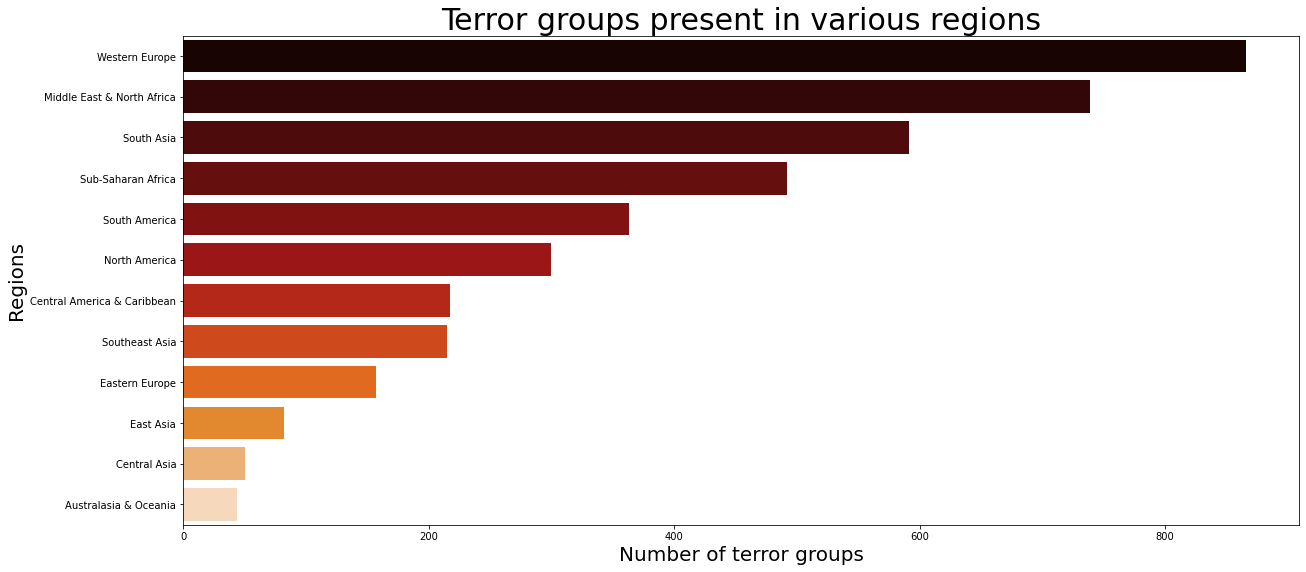

In [140]:
sns.barplot(data = gtd7, x = 'number_of_groups', y = 'region_name', ci = None, palette = 'gist_heat')
sns.color_palette("mako", as_cmap=True)
plt.title('Terror groups present in various regions', fontsize = 30)
plt.xlabel('Number of terror groups', fontsize = 20)
plt.ylabel('Regions', fontsize = 20)


##**Inference**
##**Western Europe, Middle East , North Africa, South Africa , Sub-Saharan Africa  and North America** are the regions which require meticulous terrorist neutralizing activities.

#**7.Intensity of terror attacks over various countries**

In [141]:
#calculating number of attacks in each country
country = new_gtd.groupby('country_name')['country_id'].count().reset_index().rename(columns = {'country_id':'number of attacks'})
country.sort_values(by="number of attacks",ascending=False,inplace=True)

In [142]:
country.head()

,country_name,number of attacks
84,Iraq,24636
134,Pakistan,14368
0,Afghanistan,12731
80,India,11960
35,Colombia,8306


Text(0, 0.5, 'Number of attacks')

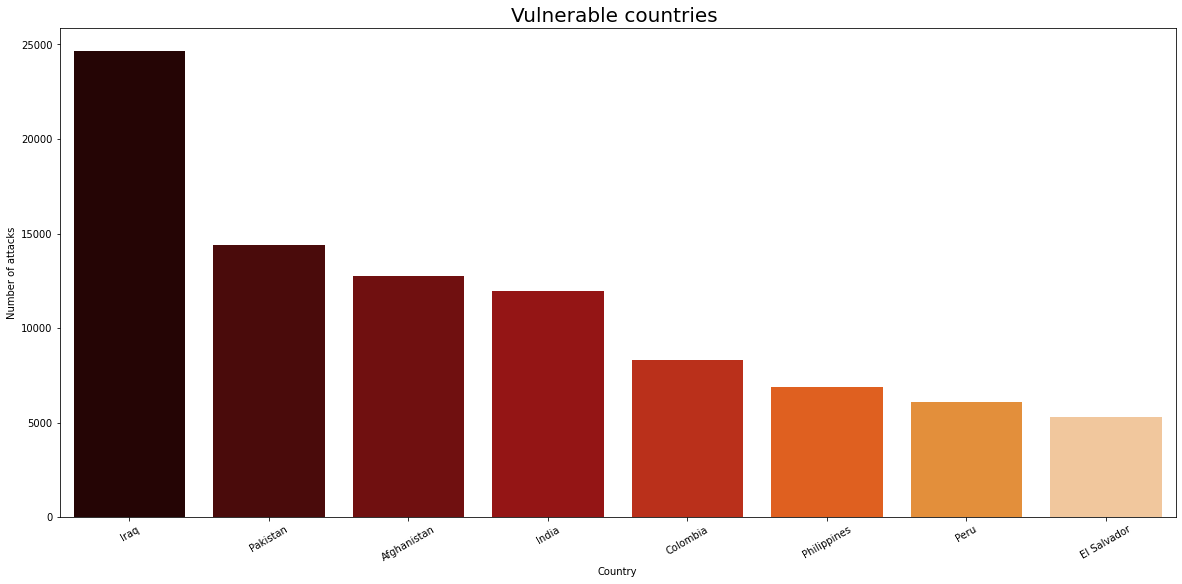

In [143]:
sns.barplot(data = country.head(8), x = 'country_name', y = 'number of attacks', ci = None, palette = 'gist_heat').tick_params(axis='x', rotation=30)
sns.color_palette("mako", as_cmap=True)
plt.title("Vulnerable countries ", fontsize = 20)
plt.xlabel("Country", fontsize = 10)
plt.ylabel("Number of attacks", fontsize = 10)

##**Inferences**

##**Iraq, Pakistan & Afghanistan** are the hotspots for terrotists and they bear the brunt of the terrorism the highest, righfullt so.

#**8.Most frequently used weapons**

In [144]:
#obtaining dataframe containing weapon type and count of it being used
weapon=new_gtd["weapon"].value_counts().reset_index().rename(columns={"index":"weapon_type","weapon":"Usage"})

In [145]:
weapon.sort_values(by="Usage",ascending=False,inplace=True)

In [146]:
weapon.weapon_type[7] 

'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'

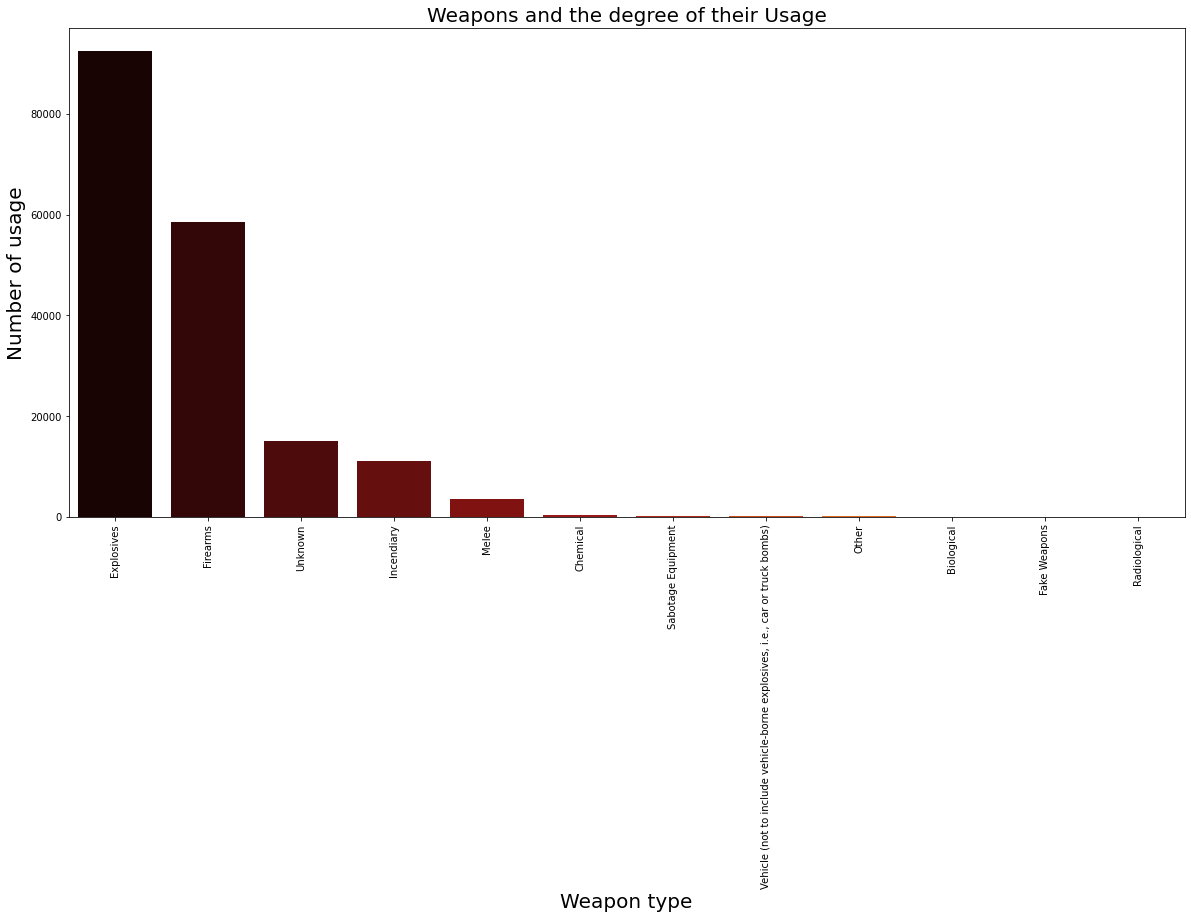

In [147]:
sns.barplot(data = weapon.head(25), x = 'weapon_type', y = 'Usage', palette = 'gist_heat').tick_params(axis='x', rotation=90)
plt.title('Weapons and the degree of their Usage', fontsize = 20)
plt.xlabel('Weapon type', fontsize = 20)
plt.ylabel('Number of usage', fontsize = 20)
plt.show()

#**Findings**
# Explosives and Firearms are the most used weapons as these are the weapons of mass destruction

#9.**Which terrorist group is carrying out the most number of attacks**

In [148]:
df=new_gtd.groupby("gname").agg({'gname':'count'}).rename(columns={"gname":"num_of_attacks"}).reset_index()
df.head()

,gname,num_of_attacks
0,1 May,10
1,14 K Triad,4
2,14 March Coalition,1
3,14th of December Command,3
4,15th of September Liberation Legion,1


In [149]:
df.sort_values(by='num_of_attacks',ascending=False,inplace=True)

In [150]:
df.head()

,gname,num_of_attacks
3408,Unknown,82782
3138,Taliban,7478
1535,Islamic State of Iraq and the Levant (ISIL),5613
2948,Shining Path (SL),4555
1120,Farabundo Marti National Liberation Front (FMLN),3351


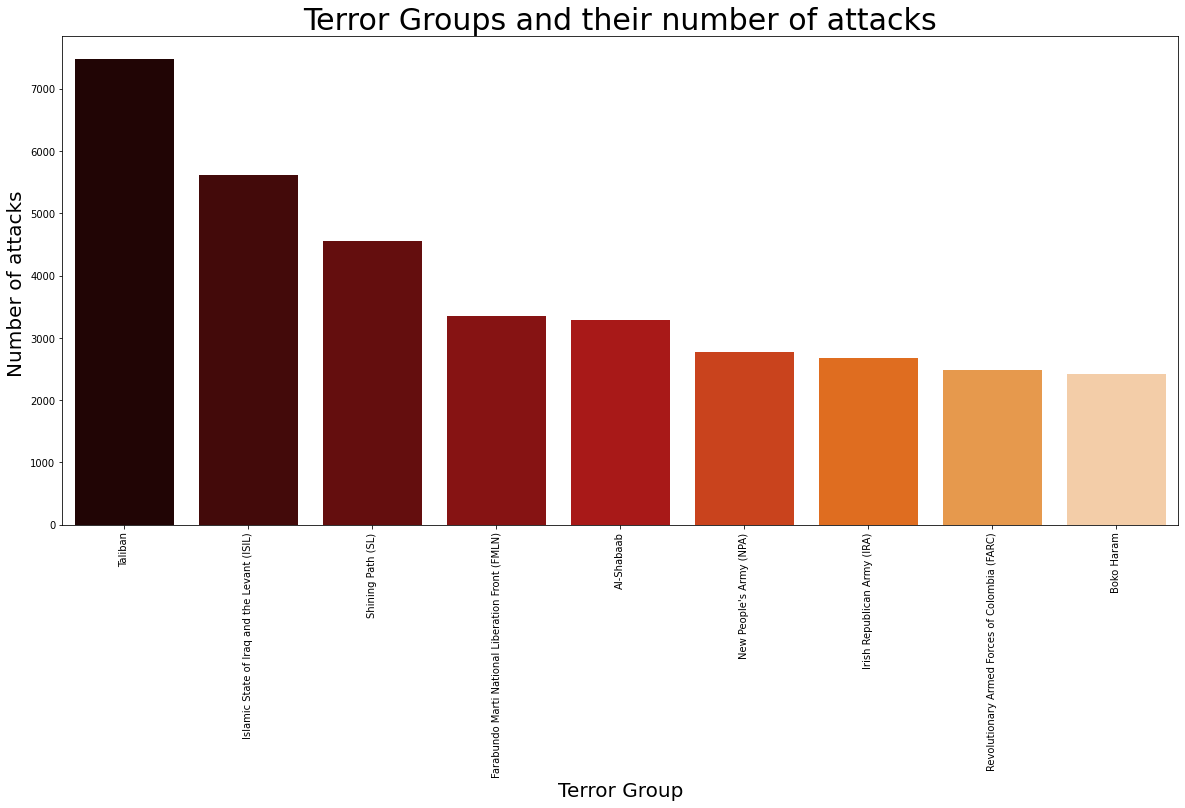

In [151]:
sns.barplot(data = df[1:10], x = 'gname', y = 'num_of_attacks', palette = 'gist_heat').tick_params(axis='x', rotation=90)
plt.rcParams["figure.figsize"]=(25,10)
plt.title('Terror Groups and their number of attacks', fontsize = 30)
plt.xlabel('Terror Group', fontsize = 20)
plt.ylabel('Number of attacks ', fontsize = 20)
plt.show()

##**Inferences**
###The Taliban and ISIS carried out more attacks.

#**10.Types of Casualties**





In [152]:
gtd_df.columns

Index(['eventid', 'iyear', 'imonth', 'country', 'country_txt', 'region',
       'region_txt', 'provstate', 'city', 'success', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'gname', 'weaptype1',
       'weapon', 'nkill', 'nwound'],
      dtype='object')

In [153]:
 df1 = gtd_df.groupby('iyear').agg({'eventid':"count",'nkill':'sum',"nwound":'sum'})

In [154]:
df1.rename(columns={'eventid':"num_of_attacks",'nkill':"num_of_civilians_killed","nwound":"num_of_civilians_wounded"},inplace=True)

In [155]:
df1.reset_index(inplace=True)

In [156]:
df1.head()

,iyear,num_of_attacks,num_of_civilians_killed,num_of_civilians_wounded
0,1970,651,174.0,212.0
1,1971,471,173.0,82.0
2,1972,568,566.0,409.0
3,1973,473,370.0,495.0
4,1974,581,539.0,865.0


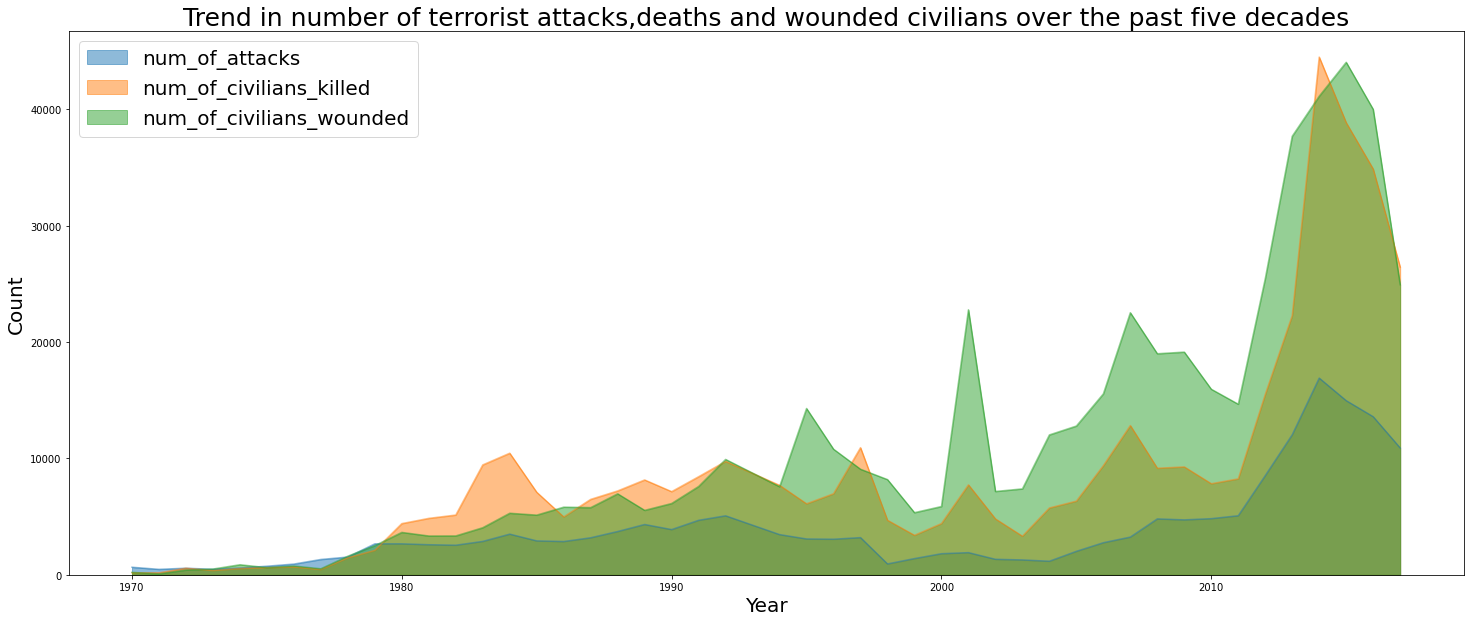

In [157]:
plt.rcParams["figure.figsize"]=(25,10)
df1.plot(x="iyear",y=['num_of_attacks','num_of_civilians_killed','num_of_civilians_wounded'],kind="area",stacked=False).legend(fontsize=20)
plt.title("Trend in number of terrorist attacks,deaths and wounded civilians over the past five decades",fontsize=25)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Count",fontsize=20)

plt.show()

#**11.Civilian Deaths across  Various Countries**

In [158]:
country = gtd.groupby('country_txt')['nkill'].sum().reset_index().sort_values(by = 'nkill', ascending = False).rename(columns = {'country_txt':'country', 'nkill':'deaths'})

In [159]:
country.head()

,country,deaths
84,Iraq,78589.0
0,Afghanistan,39384.0
134,Pakistan,23822.0
130,Nigeria,22682.0
80,India,19341.0


In [160]:
deaths = gtd[(gtd['country_txt']== 'Iraq')|(gtd['country_txt']== 'India')|(gtd['country_txt']== 'Pakistan')|(gtd['country_txt']== 'Afghanistan')|(gtd['country_txt']== 'Nigeria')]

In [161]:
deaths1 = deaths.groupby(['iyear','country_txt']).agg({'nkillus':'count'}).unstack().rename(columns = {'country_txt':'country','nkillus':'deaths'})

In [162]:
deaths1.fillna(0, inplace = True)
deaths1.head()

deaths                            
country_txt Afghanistan India Iraq Nigeria Pakistan
iyear                                              
1970                0.0   0.0  0.0     0.0      1.0
1972                0.0   1.0  0.0     0.0      0.0
1973                0.0   0.0  0.0     0.0      0.0
1974                0.0   0.0  0.0     0.0      1.0
1975                0.0   1.0  1.0     0.0      0.0

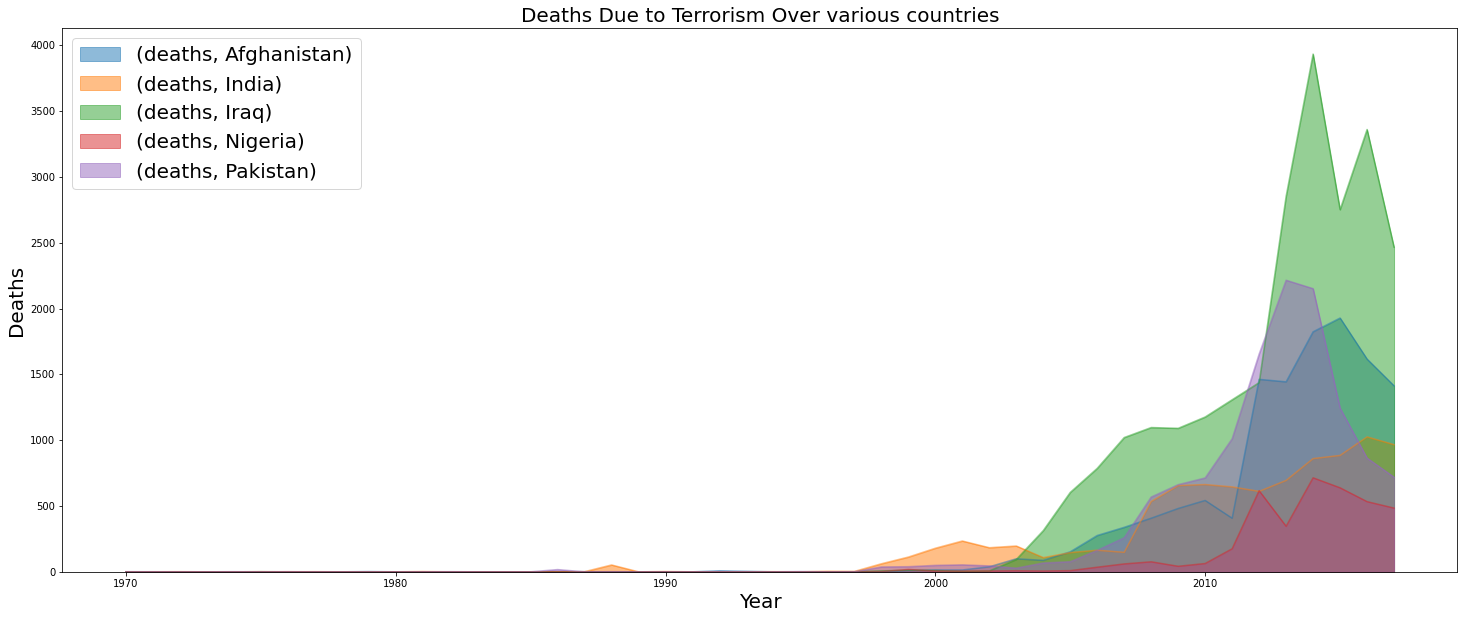

In [163]:
deaths1.plot(kind='area',stacked=False).legend(fontsize=20)
plt.title('Deaths Due to Terrorism Over various countries',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Deaths',fontsize=20)
plt.show()

#**12.Deadliest Terror Groups**

In [164]:
df10=gtd.groupby("gname")["nkill"].sum().reset_index().rename(columns = {'gname':'Terror Group', 'nkill':'Deaths'}).sort_values(by ='Deaths',ascending = False)

In [165]:
df10[1:12]

,Terror Group,Deaths
1535,Islamic State of Iraq and the Levant (ISIL),38923.0
3138,Taliban,29410.0
704,Boko Haram,20328.0
2948,Shining Path (SL),11601.0
1864,Liberation Tigers of Tamil Eelam (LTTE),10989.0
177,Al-Shabaab,9330.0
1120,Farabundo Marti National Liberation Front (FMLN),8065.0
2276,Nicaraguan Democratic Force (FDN),6662.0
3165,Tehrik-i-Taliban Pakistan (TTP),6042.0
2717,Revolutionary Armed Forces of Colombia (FARC),5661.0


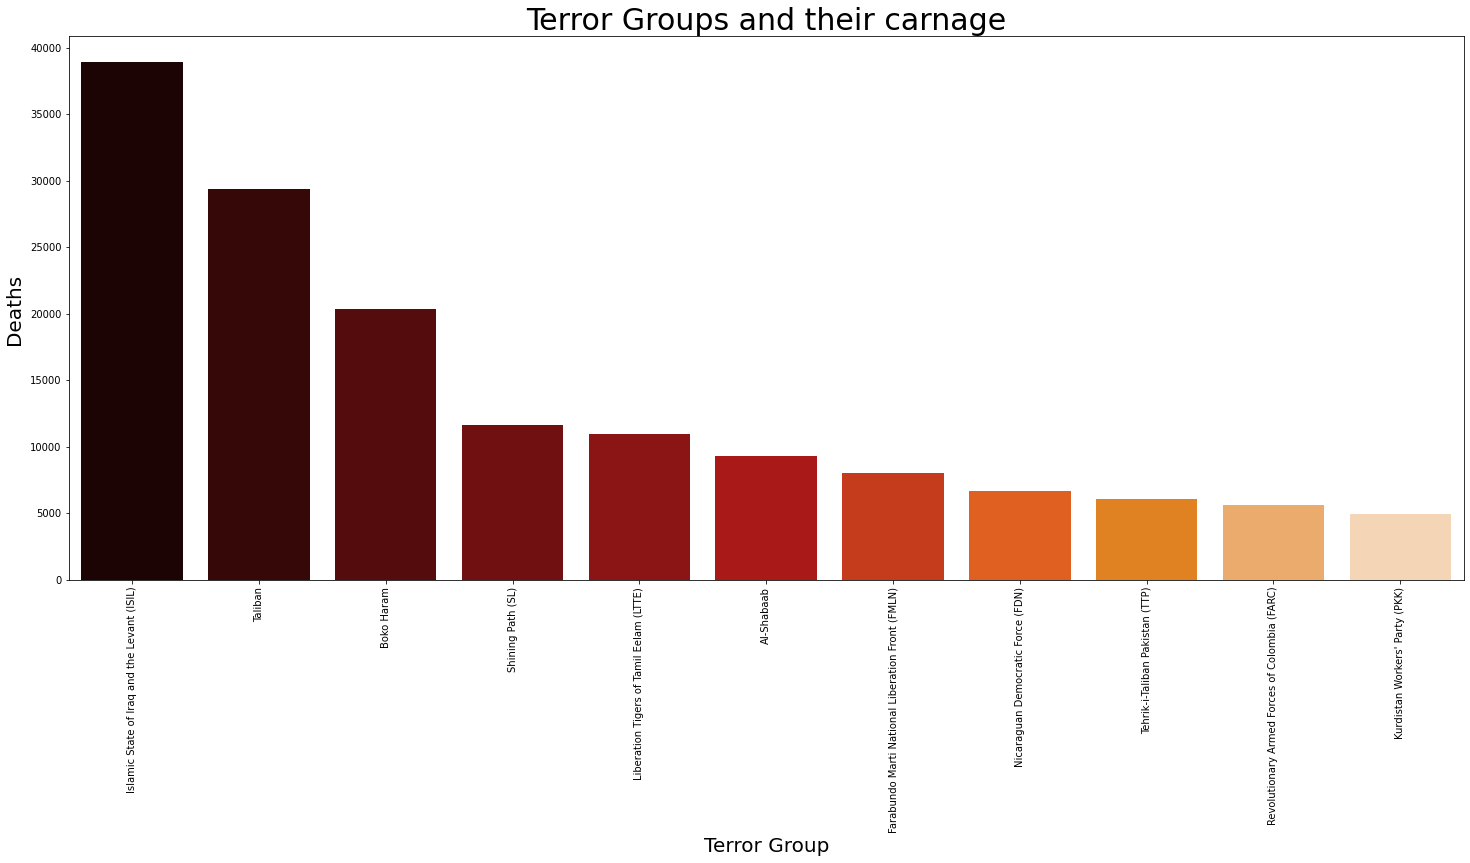

In [166]:
sns.barplot(data = df10[1:12], x = 'Terror Group', y = 'Deaths', palette = 'gist_heat').tick_params(axis='x', rotation=90)
plt.rcParams["figure.figsize"]=(25,10)
plt.title('Terror Groups and their carnage', fontsize = 30)
plt.xlabel('Terror Group', fontsize = 20)
plt.ylabel('Deaths ', fontsize = 20)
plt.show()